In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

def adjust_fontsize(ax):
    for ax in ax:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] 
                     + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(14)  

## Forward pass

![alt text](https://github.com/jphreid/tutorial_ivado/raw/master/lstm_finance.003.jpeg)


In [2]:
print("Features:", iris.feature_names, iris.data.shape, end="\n\n")
print("Labels:", iris.target_names, iris.target.shape)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] (150, 4)

Labels: ['setosa' 'versicolor' 'virginica'] (150,)


In [3]:
# A single example.
x = iris.data[0]
y = iris.target[0]
print("x:", x, end="\n\n")
print("y:", y)

x: [5.1 3.5 1.4 0.2]

y: 0


In [4]:
x_size = len(iris.feature_names)
hidden_size_1 = 10
hidden_size_2 = 5
y_size = len(iris.target_names)

# First layer parameters.
W_1 = np.random.uniform(-1, 1, (hidden_size_1, x_size))
b_1 = np.zeros(hidden_size_1)
print("W_1 of shape", W_1.shape, "\n", W_1, end="\n\n")

# First hidden layer representation.
hidden_layer_1 = np.tanh(np.dot(W_1, x)) + b_1
print("hidden_layer_1 of shape", hidden_layer_1.shape, "\n", hidden_layer_1)

W_1 of shape (10, 4) 
 [[ 0.98053442 -0.51634972  0.966817    0.17739325]
 [ 0.56591976  0.4170811   0.85561881 -0.51141651]
 [-0.52014578  0.95638721 -0.36709842  0.6363181 ]
 [-0.26686441 -0.84724748  0.72284261  0.99273697]
 [-0.53533127  0.34676187  0.32316615 -0.05595782]
 [ 0.48040006  0.97726103  0.82768556  0.19370999]
 [ 0.07204386  0.05676342  0.64599429  0.71317465]
 [-0.0561428   0.74526692  0.2140469  -0.2951761 ]
 [-0.11721422 -0.51073397 -0.64623697  0.23417194]
 [ 0.92344681 -0.80842301  0.85026429  0.52845245]]

hidden_layer_1 of shape (10,) 
 [ 0.99979076  0.99996246  0.29855965 -0.99607548 -0.7914429   0.99999855
  0.92362015  0.98818342 -0.99695694  0.99652066]


In [5]:
# Second layer parameters.
W_2 = np.random.uniform(-1, 1, (hidden_size_2, hidden_size_1))
b_2 = np.zeros(hidden_size_2)
print("W_2 of shape", W_2.shape, "\n", W_2, end="\n\n")

# Second hidden layer representation.
hidden_layer_2 = np.tanh(np.dot(W_2, hidden_layer_1)) + b_2
print("hidden_layer_2 of shape", hidden_layer_2.shape, "\n", hidden_layer_2)

W_2 of shape (5, 10) 
 [[-0.65370219 -0.59911469 -0.06194089 -0.7824068   0.28202214 -0.39694981
   0.92359961  0.49859254  0.00835707 -0.40347674]
 [ 0.77796144 -0.8534923  -0.19561873 -0.34954985 -0.65178277 -0.89270155
  -0.29488881  0.73167633  0.32005522  0.0406525 ]
 [ 0.09509573 -0.96566247 -0.93036532  0.40695078  0.5533503  -0.99627722
  -0.34643125  0.70303921  0.88939399 -0.73604521]
 [ 0.7847442   0.43320633 -0.40907862 -0.61130298 -0.02992561 -0.0920216
   0.41954952  0.46026844 -0.87864836 -0.69887331]
 [ 0.79471996  0.33482924  0.78248303  0.49321149  0.35540901 -0.33080193
   0.94813191  0.37226208 -0.83062071  0.70813985]]

hidden_layer_2 of shape (5,) 
 [-0.17480273  0.00935585 -0.99957934  0.99022465  0.99540641]


In [6]:
# Output layer parameters.
W_3 = np.random.uniform(-1, 1, (y_size, hidden_size_2))
b_3 = np.zeros(y_size)
print("W_3 of shape", W_3.shape, "\n", W_3, end="\n\n")

# Output layer representation before applying softmax.
output_layer = np.dot(W_3, hidden_layer_2) + b_3
print("output_layer of shape", output_layer.shape, "before softmax\n", output_layer, end="\n\n")

# Output layer representation after applying softmax.
def softmax(x):
    x -= np.max(x)
    return np.exp(x) / np.sum(np.exp(x))    


output_layer = softmax(output_layer)
print("output_layer of shape", output_layer.shape, "after softmax\n", output_layer, end="\n\n")

# Predicted class.
y_pred = np.argmax(output_layer)
print("y_pred:", y_pred)

W_3 of shape (3, 5) 
 [[ 0.56496729  0.3796276   0.51258452 -0.45316331  0.33910935]
 [ 0.12502222 -0.10445616 -0.79134633 -0.71407616 -0.40196042]
 [-0.40604841  0.4050057   0.76932137 -0.3644521   0.2042817 ]]

output_layer of shape (3,) before softmax
 [-0.71875684 -0.33902786 -0.85177635]

output_layer of shape (3,) after softmax
 [0.29964016 0.43804046 0.26231938]

y_pred: 1


## Backpropagation

In [7]:
all_data = np.concatenate((iris.data, iris.target.reshape(150, 1)), axis=1)
np.random.shuffle(all_data)
x = all_data[:100, :4]
y = all_data[:100, 4].astype(int)

xt = all_data[100:, :4]
yt = all_data[100:, 4].astype(int)

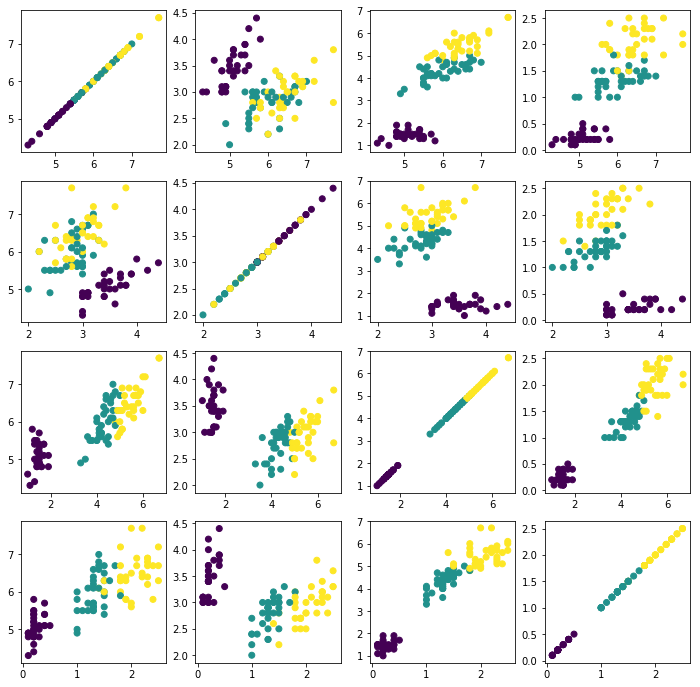

In [8]:
fig, ax = plt.subplots(4,4,figsize=(12,12))

for i in range(4):
    for j in range(4):
        ax[i, j].scatter(x[:, i], x[:, j], c=y, marker='o')

plt.show()

In [9]:
def relu(x):
    return x * (x > 0)

def softmax(x):
    
    return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(x.shape[0], 1)


class MLP():
    def __init__(self, h1):
        self.h1 = h1
        self.w1 = np.random.rand(h1, 4)
        self.w2 = np.random.rand(3, h1)
        self.b1 = np.zeros(h1, None)
        self.b2 = np.zeros(3, None)
    
    def forward(self, xx):
        self.ha = xx.dot(self.w1.T) + self.b1
        self.hs = relu(self.ha)
        self.oa = self.hs.dot(self.w2.T) + self.b2         
        self.os = softmax(self.oa)
        
        return self.os
    
    def loss(self, xx, yy):
        return np.choose(yy[None, :], -np.log(self.forward(xx).T))

    def backward(self, xx, yy):
        self.grad_oa = (self.os - np.eye(3)[yy])
        self.grad_w2 = self.grad_oa.T.dot(self.hs)
        self.grad_b2 = np.sum(self.grad_oa, axis=0)
        self.grad_hs = self.grad_oa.dot(self.w2)
        self.grad_ha = np.where(self.ha > 0, self.grad_hs , 0)
        self.grad_w1 = self.grad_ha.T.dot(xx)
        self.grad_b1 = np.sum(self.grad_ha, axis=0)
        self.grad_x = np.sum(self.grad_ha.dot(self.w1), axis=1)

        return self.grad_oa, self.grad_w2, self.grad_b2, self.grad_hs, self.grad_ha, self.grad_w1, self.grad_b1, self.grad_x
    
    def update(self, eta):
        self.w1 = self.w1 - eta*self.grad_w1
        self.b1 = self.b1 - eta*self.grad_b1
        self.w2 = self.w2 - eta*self.grad_w2
        self.b2 = self.b2 - eta*self.grad_b2

In [10]:
model = MLP(10)

In [11]:
print('Finite difference')
print('=================')
eps = 1e-5
grad_x = (model.loss(x + eps, y) - model.loss(x, y))/1e-5
print(grad_x[:, :5])

print()

print('Backpropagation')
print('=================')

grad_oa, grad_w2, grad_b2, grad_hs, grad_ha, grad_w1, grad_b1, grad_x = model.backward(x, y)
print(grad_x[:5])


print()
print('They are the same! ')
print()

Finite difference
[[ 4.07172405  4.07169672  2.81817138 -0.00441317 -0.00408125]]

Backpropagation
[ 4.07172405  4.07169672  2.81817138 -0.00441324 -0.00408131]

They are the same! 



## Training

In [12]:
# could do minibatch instead. 
losses = []
for i in range(10000):
    output = model.forward(x)
    pred = np.argmax(output, axis=1)
    loss = np.sum(model.loss(x, y))

    grads = model.backward(x, y)
    model.update(0.0001)
    losses.append(loss)
    if i%1000==0:
        print(loss)

988.3022922073465
15.875012909919954
8.268746009992716
6.112531159000074
5.132156766279393
4.572637374298882
4.2104364622163954
3.957002438756854
3.770940097113864
3.627601019255819


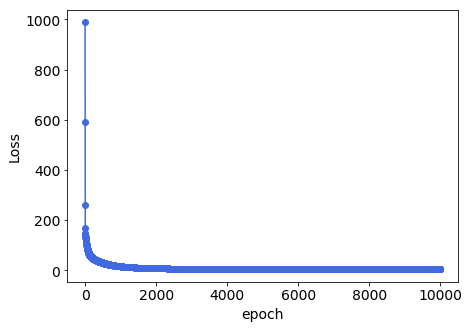

In [13]:
fig = plt.figure(figsize=(7, 5))
plt.plot(losses, 'o-', color='royalblue')
plt.xlabel('epoch')
plt.ylabel('Loss')
adjust_fontsize(fig.axes)
plt.show()

In [14]:
output = model.forward(xt)
pred_t = np.argmax(output, axis=1)
print('Test accuracy: {}%'.format(100*(1-(np.sum(np.abs(pred_t - yt))/yt.shape[0]))))

Test accuracy: 96.0%
